## Task 2: Prediction using unsupervised machine learning model and visual representation of optimum number of clusters

## Author: Prashant Sharma

### Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score as db

### Importing the dataset

In [19]:
df=pd.read_csv('iris.csv')
df.head()   

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Using Elbow method to find number of clusters optimal for our objective and plotting the curve.

In [27]:
features=df.iloc[:,[0, 1, 2, 3]].values #Slicing
ss=[]
for i in range(1, 15):
    model=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=123)
    model.fit(features)
    ss.append(model.inertia_) #Getting sum of squares within clusters for each value of number of clusters

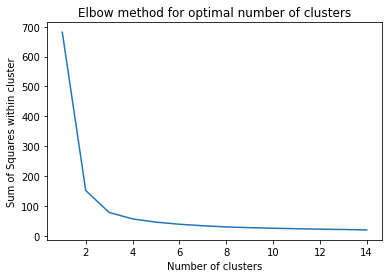

In [28]:
plt.plot(range(1, 15), ss)
plt.ylabel('Sum of Squares within cluster') # Within cluster sum of squares
plt.xlabel('Number of clusters')
plt.title('Elbow method for optimal number of clusters')
plt.show()

### 3 clusters are optimal for our objective. With increase in number of clusters beyond this, there are small decriments in value of sum of squares while decreasing clusters below 3 results in a suddent spike in sum of squares values. 

In [30]:
model=KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=123)
y_pred=model.fit_predict(features)

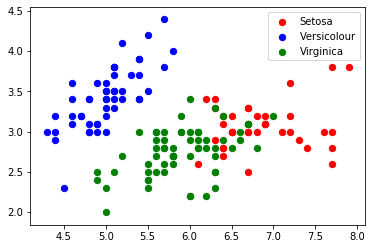

In [31]:
plt.scatter(features[y_pred==0,0],features[y_pred==0,1],s=40,c='red',label='Setosa')
plt.scatter(features[y_pred==1,0],features[y_pred==1,1],s=40,c='blue',label='Versicolour')
plt.scatter(features[y_pred==2,0],features[y_pred==2,1],s=40,c='green',label='Virginica')
plt.legend()

### Using Davies-Bouldin index as a performance metric for our unsupervised machine learning model

In [32]:
labels=kmeans.labels_
db(features, labels)

0.6619715465007528

### Davies Bouldin index is bounded (0-1). Lower the index, the better. Using this model, 0.66 score was calculated. Not great, not terrible.